In [1]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [2]:
import json
import pandas as pd
from src.evaluation.answer_evaluator import AnswerEvaluator

In [3]:
with open('../results/detailed_results_20241226_221122.json') as f:
    results = json.load(f)

In [4]:
evaluator = AnswerEvaluator()

In [5]:
evaluator.compare_answers(results[0]['processed_answers'][0], results[0]['expected_answers'][0])

{'smape': 0.21367521367521672,
 'prefix_match': True,
 'suffix_match': True,
 'decimal_places_match': False}

In [6]:
results[0] 

{'entry_id': 'entry_2212',
 'questions': ['what is the percent change in research and development contract costs between 2005 and 2006?'],
 'expected_answers': ['187%'],
 'llm_responses': ['```json\n{\n    "formula": "divide(subtract(57761, 20098), 20098)",\n    "formatting_instructions": {\n        "prefix": "",\n        "suffix": "%",\n        "rounding": 2,\n        "multiplier": 100\n    }\n}\n```\n'],
 'processed_answers': ['187.40%']}

In [7]:
empty_evalutaion = {
    'smape': None,
    'prefix_match': None,
    'suffix_match': None,
    'decimal_places_match': None
}

In [8]:
for result in results:
    evaluation = []
    for expected, processed in zip(result['expected_answers'], result['processed_answers']):
        try:
            evaluation.append(evaluator.compare_answers(processed, expected))
        except:
            print(f"Could not process {result['entry_id']}: processed={processed}, expected={expected}")
            evaluation.append(empty_evalutaion)
    result['evaluation'] = evaluation

Could not process entry_0497: processed=inf%, expected=15.6%
Could not process entry_1648: processed=3 years, expected=
Could not process entry_0006: processed=inf%, expected=15.6%
Could not process entry_0791: processed=$1.0, expected=$ 8.3 < interest income < $ 41.1 . or the interest income would be between $ 8.3 million and $ 41.1 million
Could not process entry_1081: processed=-100.77%, expected=
Could not process entry_1000: processed=31250, expected=
Could not process entry_2072: processed=0, expected=no
Could not process entry_2315: processed=1, expected=yes
Could not process entry_2175: processed=44.17%, expected=
Could not process entry_0681: processed=$35411, expected=$ 35411 or 9.8% increase
Could not process entry_2782: processed=None, expected=18962
Could not process entry_0128: processed=0, expected=no
Could not process entry_0937: processed=8.18%, expected=
Could not process entry_3007: processed=0.20%, expected=
Could not process entry_1849: processed=1.07, expected=[22

In [9]:
results[2]

{'entry_id': 'entry_1375',
 'questions': ['in 2008 what was the ratio of the direct amount to the amount ceded to other companies',
  'what is the percentage of amount ceded to direct amount in 2007?'],
 'expected_answers': ['2.62', '39.8%'],
 'llm_responses': ['```json\n{\n    "formula": "divide(16087, 6144)",\n    "formatting_instructions": {\n        "prefix": "",\n        "suffix": "",\n        "rounding": 2,\n        "multiplier": 1\n    }\n}\n```\n',
  '```json\n{\n    "formula": "divide(5834, 14673)",\n    "formatting_instructions": {\n        "prefix": "",\n        "suffix": "%",\n        "rounding": 2,\n        "multiplier": 100\n    }\n}\n```\n'],
 'processed_answers': ['2.62', '39.76%'],
 'evaluation': [{'smape': 0.0,
   'prefix_match': True,
   'suffix_match': True,
   'decimal_places_match': True},
  {'smape': 0.10055304172951017,
   'prefix_match': True,
   'suffix_match': True,
   'decimal_places_match': False}]}

In [10]:
len(results)

608

In [11]:
df = pd.DataFrame(results)
list_columns = ['questions', 'expected_answers', 'llm_responses', 'processed_answers', 'evaluation']
df = df.explode(list_columns).reset_index(drop=True)

In [12]:
eval_df = pd.json_normalize(df['evaluation'])
results_df = df.drop(columns=['evaluation', 'llm_responses']).merge(eval_df, left_index=True, right_index=True)

<Axes: >

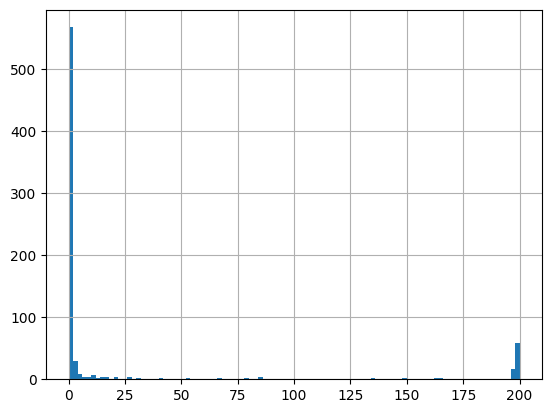

In [13]:
results_df['smape'].hist(bins=100)

In [42]:
results_df[(results_df['smape'].between(1,10, inclusive='both')) & (results_df['decimal_places_match'] == False)]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match
13,entry_1984,what is the expected growth rate in amortizati...,-0.3%,-0.31%,3.278689,True,True,False
25,entry_2509,what percentage of the total purchase price wa...,27%,26.60%,1.492537,True,True,False
26,entry_2509,customer relationships represented what percen...,32%,31.67%,1.036595,True,True,False
29,entry_2067,what is the growth rate in research and develo...,1.2%,1.18%,1.680672,True,True,False
30,entry_2067,what was the percentage growth of the cash div...,39%,38.55%,1.160542,True,True,False
...,...,...,...,...,...,...,...,...
759,entry_1839,what percentage of outstanding amounts under t...,7%,7.17%,2.399435,True,True,False
762,entry_1718,what was the percentage change in net sales fr...,3.5%,3.46%,1.149425,True,True,False
765,entry_2661,what percent of the illinois properties relate...,5.6%,5.79%,3.336260,True,True,False
787,entry_0571,what was the percentage change in earnings per...,22%,22.35%,1.578354,True,True,False


In [27]:
results_df[results_df['smape'].between(10, 175, inclusive='both')]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match
1,entry_1309,if risk-weighted assets held flat how much in ...,124137,$ 9291.20 million,172.146218,False,False,False
16,entry_1135,"for option expiration dates in 2009 , what was...",17500,35000,66.666667,True,True,True
19,entry_1061,what was the percentage increase of income for...,38.5%,34.16%,11.946050,True,True,False
20,entry_1843,what is the expected increase in the pension e...,37.79%,$ 28.8,27.001051,False,False,False
23,entry_0651,what percent change did the fx impact have on ...,-3.4%,-3.91%,13.953488,True,True,False
...,...,...,...,...,...,...,...,...
715,entry_0187,what is the percentual increase in the resulti...,189%,289.31%,41.943509,True,True,False
742,entry_1556,what is the decrease observed in the capitaliz...,33.40%,$ 16.4,68.273092,False,False,False
758,entry_1839,what percentage of outstanding amounts under t...,4%,4.49%,11.542992,True,True,False
781,entry_2418,how much has cash equivalents and marketable s...,33.9% decrease,$ 409.1,169.390519,False,False,True


In [31]:
results_df[results_df['smape'].between(195, 200, inclusive='both')]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match
4,entry_1112,"considering the years 2007-2008 , what was the...",31%,$ 8345,198.519580,False,False,True
10,entry_1124,what is the percent change in information tech...,15.4%,-13.33%,200.000000,True,True,False
22,entry_1944,how much of the securities borrowed in 2008 we...,16.8%,$0.0 billion,200.000000,False,False,True
31,entry_1812,what is the return on investment for applied m...,11.5%,-11.46%,200.000000,True,True,False
48,entry_1902,what is the annual compensation expense for th...,1692307,$15.97,199.996225,False,True,False
...,...,...,...,...,...,...,...,...
766,entry_2932,what was the approximate purchase price for th...,85606.7,$ 153500000,199.777045,False,True,False
770,entry_0108,what is the amount of cash raised from the iss...,4.5,$0.00M,200.000000,False,False,False
783,entry_2233,what was the net tax expense for the 3 years e...,-8.2,$32.4 million,200.000000,False,False,True
791,entry_1126,what was the percentage decrease from 2007 for...,1.47%,-1.47%,200.000000,True,True,True


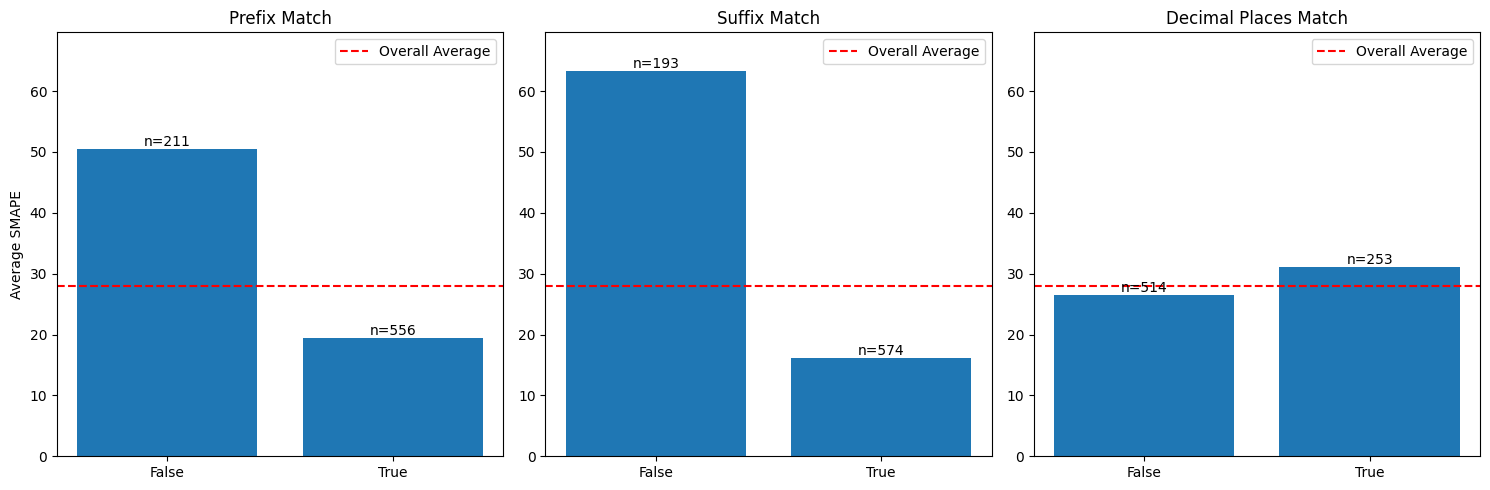


Overall Average SMAPE: 28.008

Average SMAPE by match type:

Prefix Match:
prefix_match
False    50.553787
True     19.451473
Name: smape, dtype: float64
Counts: prefix_match
True     556
False    211
Name: count, dtype: int64

Suffix Match:
suffix_match
False    63.306650
True     16.138823
Name: smape, dtype: float64
Counts: suffix_match
True     574
False    193
Name: count, dtype: int64

Decimal Places Match:
decimal_places_match
False    26.452539
True     31.167047
Name: smape, dtype: float64
Counts: decimal_places_match
False    514
True     253
Name: count, dtype: int64


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate overall average SMAPE
overall_avg = results_df['smape'].mean()

# Create figure with 3 subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Get the maximum SMAPE value for setting consistent y-axis
max_smape = max([
    results_df.groupby('prefix_match')['smape'].mean().max(),
    results_df.groupby('suffix_match')['smape'].mean().max(),
    results_df.groupby('decimal_places_match')['smape'].mean().max()
])

# Get value counts for each match type
prefix_counts = results_df['prefix_match'].value_counts()
suffix_counts = results_df['suffix_match'].value_counts()
decimal_counts = results_df['decimal_places_match'].value_counts()

# Prefix match
prefix_avg = results_df.groupby('prefix_match')['smape'].mean()
bars1 = ax1.bar(['False', 'True'], prefix_avg)
ax1.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax1.set_title('Prefix Match')
ax1.set_ylabel('Average SMAPE')
ax1.legend()
ax1.set_ylim(0, max_smape * 1.1)
# Add count annotations
for idx, bar in enumerate(bars1):
    count = prefix_counts[idx == 1]  # True is 1, False is 0
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}', ha='center', va='bottom')

# Suffix match
suffix_avg = results_df.groupby('suffix_match')['smape'].mean()
bars2 = ax2.bar(['False', 'True'], suffix_avg)
ax2.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax2.set_title('Suffix Match')
ax2.legend()
ax2.set_ylim(0, max_smape * 1.1)
# Add count annotations
for idx, bar in enumerate(bars2):
    count = suffix_counts[idx == 1]  # True is 1, False is 0
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}', ha='center', va='bottom')

# Decimal places match
decimal_avg = results_df.groupby('decimal_places_match')['smape'].mean()
bars3 = ax3.bar(['False', 'True'], decimal_avg)
ax3.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax3.set_title('Decimal Places Match')
ax3.legend()
ax3.set_ylim(0, max_smape * 1.1)
# Add count annotations
for idx, bar in enumerate(bars3):
    count = decimal_counts[idx == 1]  # True is 1, False is 0
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numerical results with counts
print(f"\nOverall Average SMAPE: {overall_avg:.3f}")
print("\nAverage SMAPE by match type:")
print("\nPrefix Match:")
print(prefix_avg)
print("Counts:", prefix_counts)
print("\nSuffix Match:")
print(suffix_avg)
print("Counts:", suffix_counts)
print("\nDecimal Places Match:")
print(decimal_avg)
print("Counts:", decimal_counts)